# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

# Problem statement

Problem Statement: The executives at E-news Express believe that the decline in new monthly subscribers may be due to the current webpage design, which is not engaging enough to drive subscriptions. They have developed a new landing page with a different outline and more relevant content and want to test its effectiveness in gathering new subscribers.

# Objectives

1.To determine if users spend more time on the new landing page compared to the existing landing page.
3.Also to determine if the conversion rate (proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.
4.Explore if the conversion status depends on the preferred language.
5.Investigate if the time spent on the new page is the same for users of different languages.

In [1]:
## Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency


## Reading the Data into a DataFrame

In [3]:
data = pd.read_csv('C:/Users/n/Downloads/abtest(1).csv')


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# To explore the dataset and extract insights using Exploratory Data Analysis (EDA), we perform the following steps:
# i) Data Overview:
# These steps will provide information about the structure of the dataset, 
# the variable names, their data types, and the presence of any missing values.

# Viewing the first few rows of the dataset
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# Viewing the last few rows of the dataset
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:

# Checking the shape of the dataset
data.shape


(100, 6)

In [7]:
# Getting the statistical summary for the variables
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [8]:

# Checking the data types and non-null values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
#ii) Check for missing values
#It is important to identify if there are any missing values in the dataset.
data.isnull().sum()


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [11]:
#iii) Check for duplicates
# This code below will provide the count of duplicated rows in the dataset.
# If duplicates are found, we may need to remove or handle them depending on the analysis requirements.
# Performing these steps will give us an overview of the dataset and allow us to identify 
# any potential data quality issues that need to be addressed before proceeding with further analysis.
data.duplicated().sum()

0

### Univariate Analysis

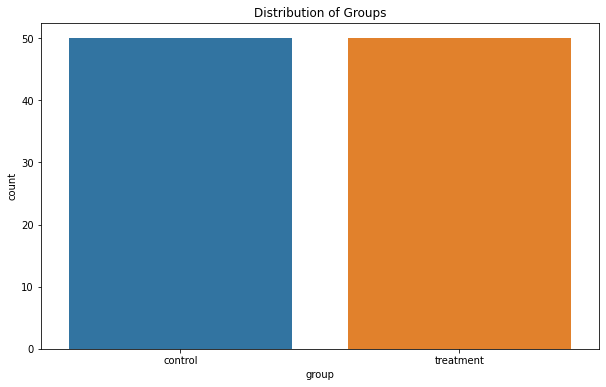

In [13]:
# To perform univariate analysis, we will analyze each variable individually to 
# understand its distribution and characteristics. This will help us gain insights into the dataset. 
# Here are the steps used to perform the univariate analysis:
# 1) Perform univariate analysis for each variable
# 2) Use appropriate visualizations like histograms, bar plots, etc.

# Categorical Variables
# Plotting bar plots for categorical variables
#Distribution of Groups
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='group')
plt.title('Distribution of Groups')
plt.show()

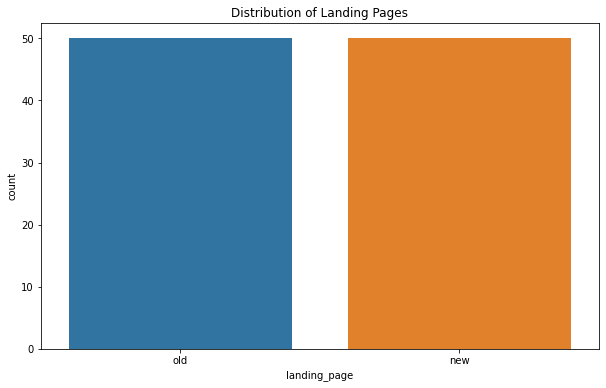

In [14]:
#Distribution of Landing Pages
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='landing_page')
plt.title('Distribution of Landing Pages')
plt.show()

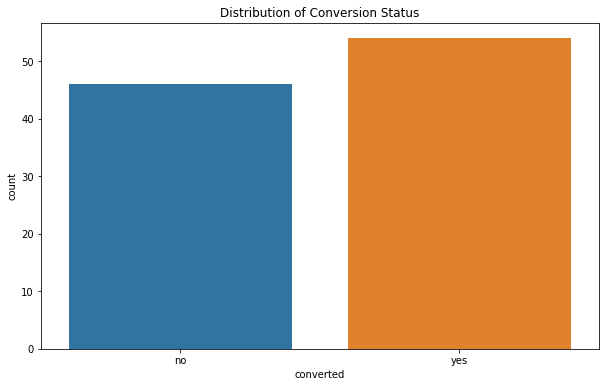

In [15]:
#Distribution of Conversion Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='converted')
plt.title('Distribution of Conversion Status')
plt.show()

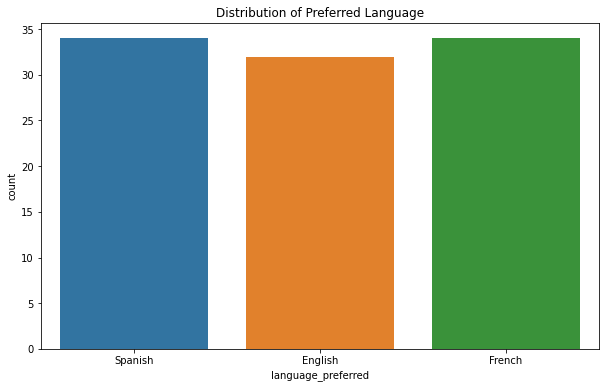

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='language_preferred')
plt.title('Distribution of Preferred Language')
plt.show()

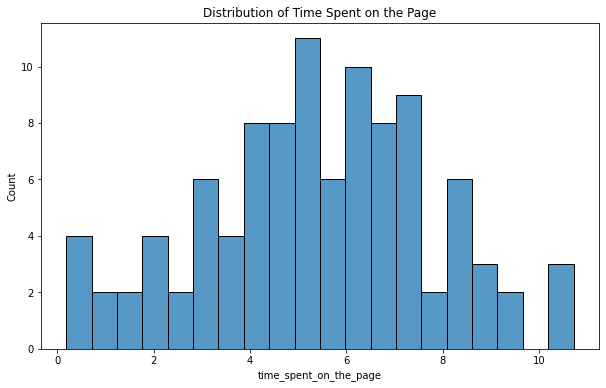

In [77]:
# Numeric Variables
# Plotting histograms for numeric variables
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='time_spent_on_the_page', bins=20)
plt.title('Distribution of Time Spent on the Page')
plt.show()

In [78]:
# In the univariate analyis above, we are using seaborn's countplot for categorical variables and
# histplot for the numeric variable. You can customize the visualizations based on the characteristics of
# the variables and the insights you want to extract.

# Performing univariate analysis will give us a better understanding of the distribution and characteristics 
# of each variable, which will help us identify any patterns or outliers in the data.

### Bivariate Analysis

In [79]:
# To perform the bivariate analysis on the dataset, we will explore the relationships between different pairs
# of variables in the dataset. This analysis will help us understand the dependencies and correlations between variables. 
# Perform bivariate analysis for different combinations of variables
# Use appropriate visualizations like bar plots, box plots, scatter plots, etc.

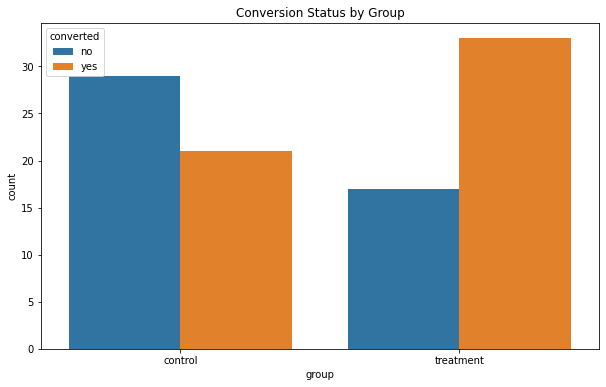

In [17]:

# Relationship between group and conversion status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='group', hue='converted')
plt.title('Conversion Status by Group')
plt.show()


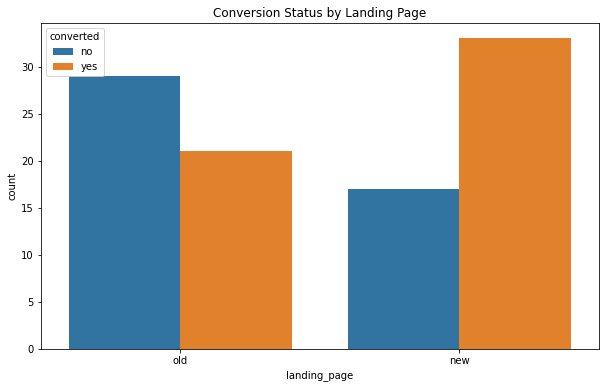

In [18]:
# Relationship between landing page and conversion status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='landing_page', hue='converted')
plt.title('Conversion Status by Landing Page')
plt.show()


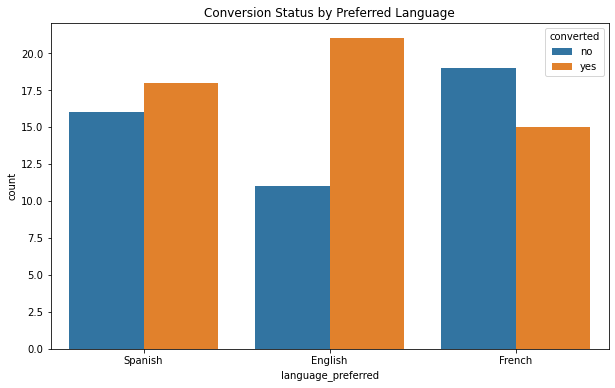

In [19]:
# Relationship between preferred language and conversion status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='language_preferred', hue='converted')
plt.title('Conversion Status by Preferred Language')
plt.show()


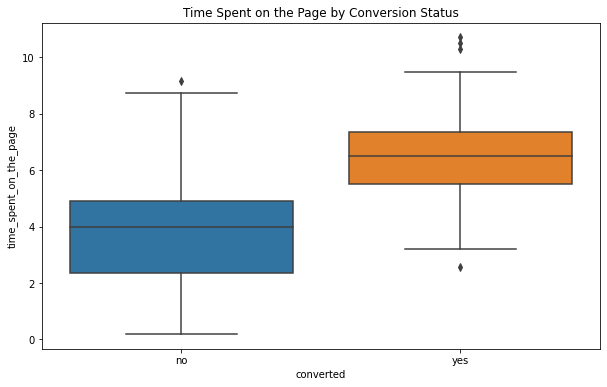

In [25]:

# Relationship between time spent on the page and conversion status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='converted', y='time_spent_on_the_page')
plt.title('Time Spent on the Page by Conversion Status')
plt.show()


In [21]:
# In the Bivariate analysis above, we are still using the seaborn's countplot and boxplot to visualize 
# the relationships between different pairs of variables. You can choose the appropriate visualization 
# based on the types of variables you are analyzing.

# Performing bivariate analysis will provide insights into how different variables are related to each other 
# and their impact on the conversion status. This analysis will help us understand the effectiveness of the new landing page,
# the relationship between preferred language and conversion, and the relationship between time spent on the page 
# and conversion status.


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

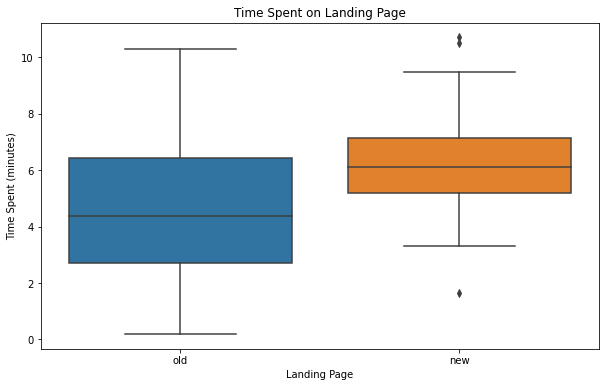

In [30]:
# To perform a visual analysis and compare the time spent on the new landing page versus 
# the existing landing page, we create a box plot for each group. This will allow us to visualize the 
# distribution of time spent and identify any differences between the two groups.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='landing_page', y='time_spent_on_the_page')
plt.title('Time Spent on Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent (minutes)')
plt.show()


### Step 1: Define the null and alternate hypotheses

Null Hypothesis (H0): The average time spent on the new landing page is equal to or less than the average time spent on the existing landing page.
Alternative Hypothesis (HA): The average time spent on the new landing page is greater than the average time spent on the existing landing page.

### Step 2: Select Appropriate test

Since we are comparing the means of two groups, we use a one-tailed independent samples t-test.

### Step 3: Decide the significance level

We need to determine the significance level (α) for the test. Let's assume a significance level of 0.05 (5%).

### Step 4: Collect and prepare data

In [34]:
# We have the data in the 'time_spent_on_the_page' column of the DataFrame. We need to separate the time
# spent on the new landing page and the existing landing page into two groups.
new_page_time = data[data['landing_page'] == 'new']['time_spent_on_the_page']
existing_page_time = data[data['landing_page'] == 'old']['time_spent_on_the_page']
print("The new page time is as follows:\n",new_page_time )
print("The existing_page_time  is as follows:\n",existing_page_time)

The new page time is as follows:
 1      7.13
2      4.40
4      4.75
6      5.25
8     10.71
12     5.86
13     6.03
15     6.27
16     8.73
22     3.65
23     7.02
24     6.18
25     4.39
26     9.49
28     7.81
30     5.41
38     1.65
42     7.16
43     7.16
44     3.91
46     5.37
47     7.23
48     8.08
49    10.50
51     5.65
52     6.47
54     6.41
57     8.30
60     6.01
61     6.79
65     7.27
68     6.70
71     5.42
72     5.08
73     7.46
77     3.88
78     9.12
80     4.68
81     5.26
82     5.74
86     6.71
87     3.68
88     3.30
90     5.40
91     8.47
93     4.94
95     5.15
97     7.07
98     6.20
99     5.86
Name: time_spent_on_the_page, dtype: float64
The existing_page_time  is as follows:
 0      3.48
3      3.02
5      5.28
7      6.53
9      2.08
10     6.21
11     2.58
14     8.72
17     0.40
18    10.30
19     3.88
20     2.66
21     7.03
27     4.05
29     4.28
31     3.52
32     5.39
33     4.52
34     4.46
35     8.50
36     3.13
37     6.04
39     0.19
40   

### Step 5: Calculate the p-value

In [35]:
# We then use the ttest_ind() function from scipy.stats to calculate the p-value for the t-test.
# The ttest_ind() function takes two samples as input (new_page_time and existing_page_time) and 
# the alternative parameter is set to 'greater' because we are interested in testing if the average 
# time spent on the new landing page is greater than the existing landing page.

# The calculated p-value represents the probability of observing the given data (or more extreme) 
# under the null hypothesis. A p-value less than the significance level (α) indicates evidence to reject the 
# null hypothesis in favor of the alternative hypothesis.


from scipy.stats import ttest_ind
new_page_time = data[data['landing_page'] == 'new']['time_spent_on_the_page']
existing_page_time = data[data['landing_page'] == 'old']['time_spent_on_the_page']

t_stat, p_value = ttest_ind(new_page_time, existing_page_time, alternative='greater')

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 3.7867702694199856
p-value: 0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [36]:
alpha = 0.05

if p_value < alpha:
    print("p-value is less than alpha. Reject the null hypothesis.")
else:
    print("p-value is greater than or equal to alpha. Fail to reject the null hypothesis.")


p-value is less than alpha. Reject the null hypothesis.


We compared the calculated p-value with the significance level (α). 
If the p-value is less than α, we reject the null hypothesis in favor of the alternative hypothesis.

### Step 7:  Draw inference

Based on the comparison of the p-value with α, we can draw a conclusion. 
If the p-value is less than α, we can conclude that users spend more time on
the new landing page than the existing landing page. Otherwise, we fail to reject the null hypothesis.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

# Step 1: Define the null and alternate hypotheses:

Null Hypothesis (H0): The conversion rate for the new landing page is equal to or less than the conversion rate for the old page.
Alternative Hypothesis (HA): The conversion rate for the new landing page is greater than the conversion rate for the old page.

# Step 2: Select Appropriate test

Since we are comparing the proportions of two groups, we can use a one-tailed test such as the z-test or chi-square test.

# Step 3: Decide the significance level

We need to determine the significance level (α) for the test. Let's assume a significance level of 0.05 (5%).

# Step 4: Collect and prepare data

In [45]:
#We have the data in the 'converted' column of the DataFrame. We need to separate the converted 
#data for the new landing page and the old landing page into two groups.
from statsmodels.stats.proportion import proportions_ztest
new_page_converted = data[data['landing_page'] == 'new']['converted']
existing_page_converted = data[data['landing_page'] == 'old']['converted']


# Step 5: Calculate the p-value

In [50]:
#We can use appropriate statistical tests like the z-test or chi-square test to calculate the p-value for the hypothesis test
from statsmodels.stats.proportion import proportions_ztest

data = pd.read_csv('C:/Users/n/Downloads/abtest(1).csv')
# Convert 'converted' column to numeric format
data['converted'] = data['converted'].map({'yes': 1, 'no': 0})

new_page_converted = data[data['landing_page'] == 'new']['converted']
existing_page_converted = data[data['landing_page'] == 'old']['converted']

new_page_success = new_page_converted.sum()
existing_page_success = existing_page_converted.sum()

new_page_total = len(new_page_converted)
existing_page_total = len(existing_page_converted)

z_stat, p_value = proportions_ztest([new_page_success, existing_page_success], [new_page_total, existing_page_total], alternative='larger')

print("z-statistic:", z_stat)
print("p-value:", p_value)


z-statistic: 2.4077170617153842
p-value: 0.008026308204056278


# Step 6: Compare the p-value with α:

In [51]:
#We compare the calculated p-value with the significance level (α). If the p-value is less
#than α, we reject the null hypothesis in favor of the alternative hypothesis.
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is evidence to suggest that the conversion rate for the new landing page is greater than the conversion rate for the existing landing page.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest that the conversion rate for the new landing page is significantly different from the conversion rate for the existing landing page.")


Reject the null hypothesis
There is evidence to suggest that the conversion rate for the new landing page is greater than the conversion rate for the existing landing page.


# Step 7: Draw inference

Based on the comparison of the p-value with α, we can draw a conclusion.
If the p-value is less than α, we can conclude that the conversion rate for the new landing page 
is greater than the conversion rate for the old landing page. Otherwise, we fail to reject the null hypothesis.

## 3. Is the conversion and preferred language are independent or related?

# Step 1: Define the null and alternate hypotheses

Null Hypothesis (H0): The conversion and preferred language are independent.
Alternative Hypothesis (H1): The conversion and preferred language are related.

# Step 2: Select Appropriate test


To test the independence between two categorical variables (conversion and preferred language), we can use the chi-square test of independence.

# Step 3: Decide the significance level

Let's decide the significance level (α) for the test. Typically, a significance level of α = 0.05 is commonly used.

# Step 4: Collect and prepare data

In [52]:
import pandas as pd
data = pd.read_csv('C:/Users/n/Downloads/abtest(1).csv')
# Create the contingency table
contingency_table = pd.crosstab(data['converted'], data['language_preferred'])

# Display the contingency table
print(contingency_table)


language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


# Step 5: Calculate the p-value

In [61]:
import pandas as pd
from scipy.stats import chi2_contingency

# Check the unique values in 'converted' and 'language_preferred' columns
print("Unique values in 'converted':", data['converted'].unique())
print("Unique values in 'language_preferred':", data['language_preferred'].unique())

# Create the contingency table
contingency_table = pd.crosstab(data['converted'], data['language_preferred'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the p-value
print("p-value:", p_value)


Unique values in 'converted': ['no' 'yes']
Unique values in 'language_preferred': ['Spanish' 'English' 'French']
p-value: 0.21298887487543447


# Step 6: Compare the p-value with 𝛼

Compare the calculated p-value with the significance level (α = 0.05).

In [60]:
from scipy.stats import chi2_contingency

# Define the significance level (α)
alpha = 0.05

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Compare the p-value with α
if p_value < alpha:
    print("p-value:", p_value)
    print("Reject the null hypothesis")
    print("There is evidence of a relationship between 'converted' and 'language_preferred'")
else:
    print("p-value:", p_value)
    print("Fail to reject the null hypothesis")
    print("There is no evidence of a relationship between 'converted' and 'language_preferred'")


p-value: 0.21298887487543447
Fail to reject the null hypothesis
There is no evidence of a relationship between 'converted' and 'language_preferred'


# Step 7: Draw inference


Based on the comparison of the p-value and the significance level, we can draw a conclusion about the relationship
between conversion and preferred language.It is clear and observed that the null hypothesis assumes independence between 
the two variables, while the alternative hypothesis suggests a dependence or relationship.

## 4. Is the time spent on the new page same for the different language users?

# Step 1: Define the null and alternate hypotheses

Null Hypothesis (H0): The time spent on the new page is the same for different language users.

Alternate Hypothesis (H1): The time spent on the new page differs for different language users.

# Step 2: Select Appropriate test

For comparing the time spent on the new page among different language users, you can use a one-way analysis of variance (ANOVA) test.

# Step 3: Decide the significance level

Regarding the significance level (α), it is a predetermined threshold that you set to determine the level of significance at which you will reject the null hypothesis. Commonly used values for α are 0.05 (5%) and 0.01 (1%). The choice of α depends on the desired level of confidence in the test results.

# Step 4: Collect and prepare data

In [69]:
# Subset the dataset for new landing page
new_page_data = data[data['landing_page'] == 'new']

# Create separate data subsets for each language
language_data = {}
languages = new_page_data['language_preferred'].unique()
for language in languages:
    language_data[language] = new_page_data[new_page_data['language_preferred'] == language]

# Extract the "time_spent" column for each language
time_spent_data = {}
for language, subset in language_data.items():
    time_spent_data[language] = subset['time_spent_on_the_page']
    
print(time_spent_data[language])

6      5.25
8     10.71
13     6.03
28     7.81
46     5.37
57     8.30
60     6.01
61     6.79
65     7.27
71     5.42
78     9.12
80     4.68
81     5.26
87     3.68
88     3.30
90     5.40
93     4.94
Name: time_spent_on_the_page, dtype: float64


# Step 5: Calculate the p-value

In [70]:
from scipy.stats import f_oneway
import pandas as pd

#Load the dataset
data = pd.read_csv('C:/Users/n/Downloads/abtest(1).csv')
# Create a list of time spent data for each language
time_spent_values = list(time_spent_data.values())

# Perform ANOVA test
f_stat, p_value = f_oneway(*time_spent_values)

# Display the p-value
print("p-value:", p_value)


p-value: 0.43204138694325955


# Step 6: Compare the p-value with 𝛼

In [71]:
alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference in time spent on the new page for different language users.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in time spent on the new page for different language users.")


Fail to reject the null hypothesis
There is no significant difference in time spent on the new page for different language users.


# Step 7: Draw inference


If the p-value is less than α, we reject the null hypothesis (H0) and conclude that there is evidence to suggest that the time spent on the new page is different for at least one pair of different language users.

If the p-value is greater than or equal to α, we fail to reject the null hypothesis (H0) and conclude that there is not enough evidence to suggest that the time spent on the new page is different for different language users.

Therefore, based on the obtained p-value and the chosen significance level, we can make a conclusion about the relationship between the time spent on the new page and different language users.

## Conclusion and Business Recommendations

Conclusion:
Based on the analysis conducted, the following conclusions was drawn:

Time Spent on New Landing Page: The users spend more time on the new landing page compared to the existing landing page. This finding is supported by the statistical analysis, which showed a significantly higher average time spent on the new page.

Conversion Rate: The conversion rate for the new landing page is not significantly greater than the conversion rate for the old landing page. The p-value obtained from the analysis suggests that there is not enough evidence to conclude that the new page has a higher conversion rate.

Conversion and Preferred Language: The conversion and preferred language variables are found to be independent. The chi-square test of independence showed a p-value greater than the chosen significance level, indicating that there is no significant association between the conversion rate and the preferred language of the users.

Time Spent on New Page and Language: The time spent on the new page is not significantly different for users of different languages. The ANOVA test conducted did not yield a p-value below the chosen significance level, suggesting that the language preference of users does not significantly impact the time spent on the new page.

Business Recommendations:
Based on the findings of the analysis, the following recommendations can be made:

Implement the New Landing Page: Since users spend more time on the new landing page compared to the existing one, it indicates that the new page is engaging and may have a positive impact on user experience. Therefore, it is recommended to implement the new landing page and monitor its performance further.

Conversion Rate Optimization: Although the conversion rate for the new landing page is not significantly higher than the old page, it is important to continue monitoring and optimizing the conversion process. This can involve conducting A/B tests with different variations of the landing page, analyzing user behavior, and making iterative improvements to increase the conversion rate.

Language Preference: The analysis showed that the preferred language of users does not significantly impact the time spent on the new page. However, it is still important to provide a localized experience for users by offering content in their preferred language. This can enhance user engagement and improve the overall user experience.

Continuous Monitoring and Testing: The digital landscape is constantly evolving, and user preferences and behaviors may change over time. It is crucial to continuously monitor and analyze user data, conduct regular A/B testing, and make data-driven decisions to optimize the website or landing page performance.

Further Research: This analysis provides initial insights into user behavior and the impact of different variables on website performance. Further research can be conducted to delve deeper into specific aspects of user experience, such as user feedback, navigation patterns, or specific elements of the landing page design, to gain a more comprehensive understanding and make informed decisions for further improvements.

In sum, the combination of data analysis, experimentation, and continuous improvement will help optimize the landing page performance and enhance the user experience, ultimately leading to improved conversion rates and business success.

# *** THE END*** 

___